In [17]:
import os 
import glob
import pandas as pd

### Merging all the sales files into one single file

In [18]:
# os.chdir("D:\\LearningTech\\Machine Learning\\edureka\\Pandas-Data-Science-Tasks\\SalesAnalysis\\Sales_Data")
# file_extension = '.csv'
# all_filenames = [i for i in glob.glob(f"*{file_extension}")]
# print(f"These are all of the filenames ending in .csv {all_filenames}.")

In [19]:
# combined_csv_data = pd.concat([pd.read_csv(f) for f in all_filenames])
# os.chdir('../')
# combined_csv_data.to_csv('combined_data.csv')

In [20]:
# files = [file for file in os.listdir('D:\\LearningTech\\Machine Learning\\edureka\\Pandas-Data-Science-Tasks\\SalesAnalysis\\Sales_Data')]
# all_months_data = pd.DataFrame()
# for file in files:
#     df = pd.read_csv(f"D:\\LearningTech\\Machine Learning\\edureka\\Pandas-Data-Science-Tasks\\SalesAnalysis\\Sales_Data\\{file}")
#     all_months_data = pd.concat([all_months_data, df])
# all_months_data.head(10)

# all_months_data.to_csv("combined_data.csv", index=False)

### Augment the data with additional columns

In [21]:
combined_data = pd.read_csv("all_data.csv")
combined_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean up the data and null values

In [22]:
combined_data.dropna(inplace=True)

### Task 2: adding the month column

In [23]:
from datetime import datetime

combined_data['Month'] = combined_data['Order Date'].str[0:2]
combined_data.drop(combined_data[combined_data['Month'] == 'Or'].index, inplace=True)
combined_data["Month"] = combined_data['Month'].astype('int')
combined_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Question 1: What was the best month for sales? How much was earned that month?

#### Add a sales column

In [24]:
combined_data['Price Each'] = pd.to_numeric(combined_data['Price Each'])
combined_data['Quantity Ordered'] = pd.to_numeric(combined_data['Quantity Ordered'])
combined_data['sales'] = combined_data['Quantity Ordered']*combined_data['Price Each']

In [25]:
combined_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [26]:
results = combined_data.groupby('Month').sum('Sales')
final_ans = results.sort_values('sales', ascending = False)


In [27]:
final_ans

,Quantity Ordered,Price Each,sales
Month,,,
12,28114,4588415.41,4613443.34
10,22703,3715554.83,3736726.88
4,20558,3367671.02,3390670.24
11,19798,3180600.68,3199603.20
5,18667,3135125.13,3152606.75
3,17005,2791207.83,2807100.38
7,16072,2632539.56,2647775.76
6,15253,2562025.61,2577802.26
8,13448,2230345.42,2244467.88


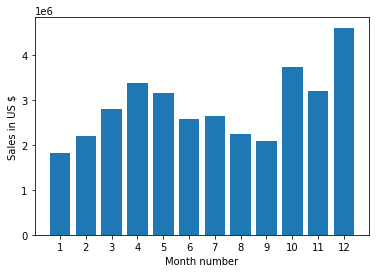

In [28]:
import matplotlib.pyplot as plt
months = range(1,13)
plt.bar(months, results['sales'])
plt.xticks(months)
plt.ylabel("Sales in US $")
plt.xlabel('Month number')
plt.show()

### What US city has the highest number of sales

In [29]:
from datetime import datetime
combined_data[['Street', 'City', 'State']] = combined_data['Purchase Address'].str.split(',', expand=True)
combined_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,Street,City,State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,917 1st St,Dallas,TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,682 Chestnut St,Boston,MA 02215
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,669 Spruce St,Los Angeles,CA 90001
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,669 Spruce St,Los Angeles,CA 90001
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,333 8th St,Los Angeles,CA 90001


In [30]:
results = combined_data.groupby(['City', 'State']).sum('Sales')
final_ans = results.sort_values('sales', ascending = False)

In [31]:
final_ans

,,Quantity Ordered,Price Each,Month,sales
City,State,,,,
San Francisco,CA 94016,50239,8211461.74,315520,8262203.91
Los Angeles,CA 90001,33289,5421435.23,208325,5452570.80
New York City,NY 10001,27932,4635370.83,175741,4664317.43
Boston,MA 02215,22528,3637409.77,141112,3661642.01
Atlanta,GA 30301,16602,2779908.20,104794,2795498.58
Dallas,TX 75001,16730,2752627.82,104620,2767975.40
Seattle,WA 98101,16553,2733296.01,104941,2747755.48
Portland,OR 97035,11303,1860558.22,70621,1870732.34
Austin,TX 73301,11153,1809873.61,69829,1819581.75


In [34]:
import matplotlib.pyplot as plt
cities = results["State"]
plt.bar(cities, results['sales'])
plt.xticks(cities, rotation=45)
plt.ylabel("Sales in US $")
plt.xlabel('City')
plt.show()

KeyError: 'State'